In [4]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import shutil
import numpy as np
from scipy import stats
from tqdm import tqdm
from IPython.display import clear_output

import py21cmfish
from py21cmfish.power_spectra import *
from py21cmfish.io import *

WDIR = os.environ['DM21CM_DIR']
sys.path.append(WDIR)

from scripts.step_size import pwave_phot_c_sigma, pwave_elec_c_sigma, pbh_hr_f, pbh_acc_f

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file(f"{WDIR}/matplotlibrc")

## 1. 21cmFISH standard astrophysics

In [5]:
noise_dir = '/n/home07/yitians/dm21cm/21cmSense_fid_EOS21/'
data_dir = '/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/bkg/'


astro_params_vary = ['DM', 'F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI', 't_STAR',
                     'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH', 'A_LW']
default_param_values = [0, -1.25, -2.5, 0.5, 0.0, 0.5, -1.35, -1.35, -0.3, 40.5, 40.5, 500, 2.0]

astro_params_vary = list(np.array(astro_params_vary))
default_param_values = default_param_values
astro_params_fid = dict()
for i in range(len(astro_params_vary)):
    astro_params_fid[astro_params_vary[i]] = default_param_values[i]
    
# Load each parameter into a dictionary
params_EoS = {}

for param in astro_params_vary[1:]:
    params_EoS[param] = py21cmfish.Parameter(
        HII_DIM=128, BOX_LEN=256, param=param,
        output_dir = data_dir,
        PS_err_dir = noise_dir,
        new = False
)
clear_output()

## 2. Fisher analysis at each mass

In [6]:
run_name = 'pbh-acc-PRc23-test'
model = 'PRc23'

if run_name.startswith('pbh-hr'):
    log10m_s = np.array([13.5, 15, 16.5, 18])
    m_PBH_s = 10 ** log10m_s # [g]
    f_PBH_s = pbh_hr_f(m_PBH_s) # [1]
    print('log10m', log10m_s)
    print('f', f_PBH_s)
    mass_s = m_PBH_s
    inj_s = f_PBH_s

elif run_name.startswith('pbh-acc'):
    log10m_s = np.array([0, 2, 4])
    m_PBH_s = 10 ** log10m_s # [M_sun]
    f_PBH_s = pbh_acc_f(m_PBH_s, model) # [1]
    print('log10m', log10m_s)
    print('f', f_PBH_s)
    mass_s = m_PBH_s
    inj_s = f_PBH_s

elif run_name == 'pwave-phot':
    m_s = 10**np.array([1.5] + list(range(2, 11)) + [12])
    c_s = pwave_phot_c_sigma(m_s)
    run_name = 'pwave/pwave-phot-iter-3'
    print('c', c_s)
    mass_s = m_s
    inj_s = c_s

elif run_name == 'pwave-elec':
    m_s = 10**np.array([6.5, 8, 9, 10, 11, 12])
    c_s = pwave_elec_c_sigma(m_s)
    run_name = 'pwave/pwave-elec-iter-3'
    print('c', c_s)
    mass_s = m_s
    inj_s = c_s

inj_dir = f'/n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/{run_name}'
os.listdir(inj_dir)

log10m [0 2 4]
f [1.77827941e-01 1.77827941e-04 1.77827941e-07]


['log10m0.000', 'log10m2.000', 'log10m4.000']

In [7]:
# Put the fiducial lightcone in each mass directory
for m in mass_s:
    source_file = f'{data_dir}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5'
    target_file = f'{inj_dir}/log10m{np.log10(m):.3f}/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_fid_r54321.h5'
    if not os.path.isfile(target_file):
        print(f'{np.log10(m):.3f}', end=' ')
        shutil.copyfile(source_file, target_file)

0.000 2.000 4.000 



Now processing m=1.000e+00


########### fisher set up for DM
    New parameter, making new global signal and power spectra from the lightcones, make derivatives
    Searching for lightcones with name /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/LightCone_z5.0_*HIIDIM=128_BOXLEN=256_fisher_**DM*.h5
Fiducial file: /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/LightCone_z5.0_*HIIDIM=128_BOXLEN=256_fisher_**fid*.h5
    Found 3 lightcones to load
    Loaded lightcones /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_2_r54321.h5
    Loaded lightcones /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/LightCone_z5.0_HIIDIM=128_BOXLEN=256_fisher_DM_1_r54321.h5
    Loaded lightcones /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/LightCon

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:219: RuntimeWarning: invalid value encountered in divide
  res = np.bincount(indx, weights=field, minlength=len(V1) + 2)[1:-1] / (V1 - V2 / V1)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:222: RuntimeWarning: invalid value encountered in divide
  res *= V2 / V1**2


    Getting PS for CDM, DM=1
        - Using k:0.03337118317301632-2.675685850887854
    Getting PS for CDM, DM=0
        - Using k:0.03337118317301632-2.675685850887854
    saved PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/power_spectrum_dict_DM.npy
    saved PS_z_HERA to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/PS_z_HERA.npy
    Fiducial: DM=1
    saved fiducial PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m0.000/power_spectrum_fid_21cmsense.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:219: RuntimeWarning: invalid value encountered in divide
  res = np.bincount(indx, weights=field, minlength=len(V1) + 2)[1:-1] / (V1 - V2 / V1)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:222: RuntimeWarning: invalid value encountered in divide
  res *= V2 / V1**2


    Getting PS for CDM, DM=1
        - Using k:0.03337118317301632-2.675685850887854
    Getting PS for CDM, DM=0
        - Using k:0.03337118317301632-2.675685850887854
    saved PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m2.000/power_spectrum_dict_DM.npy
    saved PS_z_HERA to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m2.000/PS_z_HERA.npy
    Fiducial: DM=1
    saved fiducial PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m2.000/power_spectrum_fid_21cmsense.npy
theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected th

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:325: UserWarning: One or more radial bins had no cells within it.
  return angular_average(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:180: RuntimeWarning: invalid value encountered in divide
  np.bincount(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:219: RuntimeWarning: invalid value encountered in divide
  res = np.bincount(indx, weights=field, minlength=len(V1) + 2)[1:-1] / (V1 - V2 / V1)
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/powerbox/tools.py:222: RuntimeWarning: invalid value encountered in divide
  res *= V2 / V1**2


    Getting PS for CDM, DM=1
        - Using k:0.03337118317301632-2.675685850887854
    Getting PS for CDM, DM=0
        - Using k:0.03337118317301632-2.675685850887854
    saved PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m4.000/power_spectrum_dict_DM.npy
    saved PS_z_HERA to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m4.000/PS_z_HERA.npy
    Fiducial: DM=1
    saved fiducial PS to /n/holystore01/LABS/iaifi_lab/Users/yitians/dm21cm/outputs/pbh-acc-PRc23-test/log10m4.000/power_spectrum_fid_21cmsense.npy


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


theta = [0. 1. 2.]
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
Performing power spectrum gradient for DM
Hackily corrected the spectrum gradient to be one-sided
P

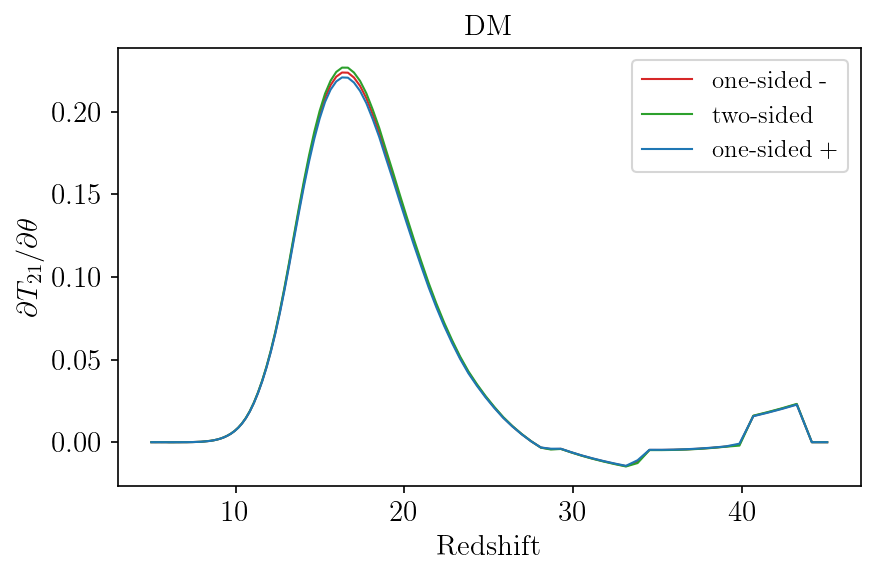

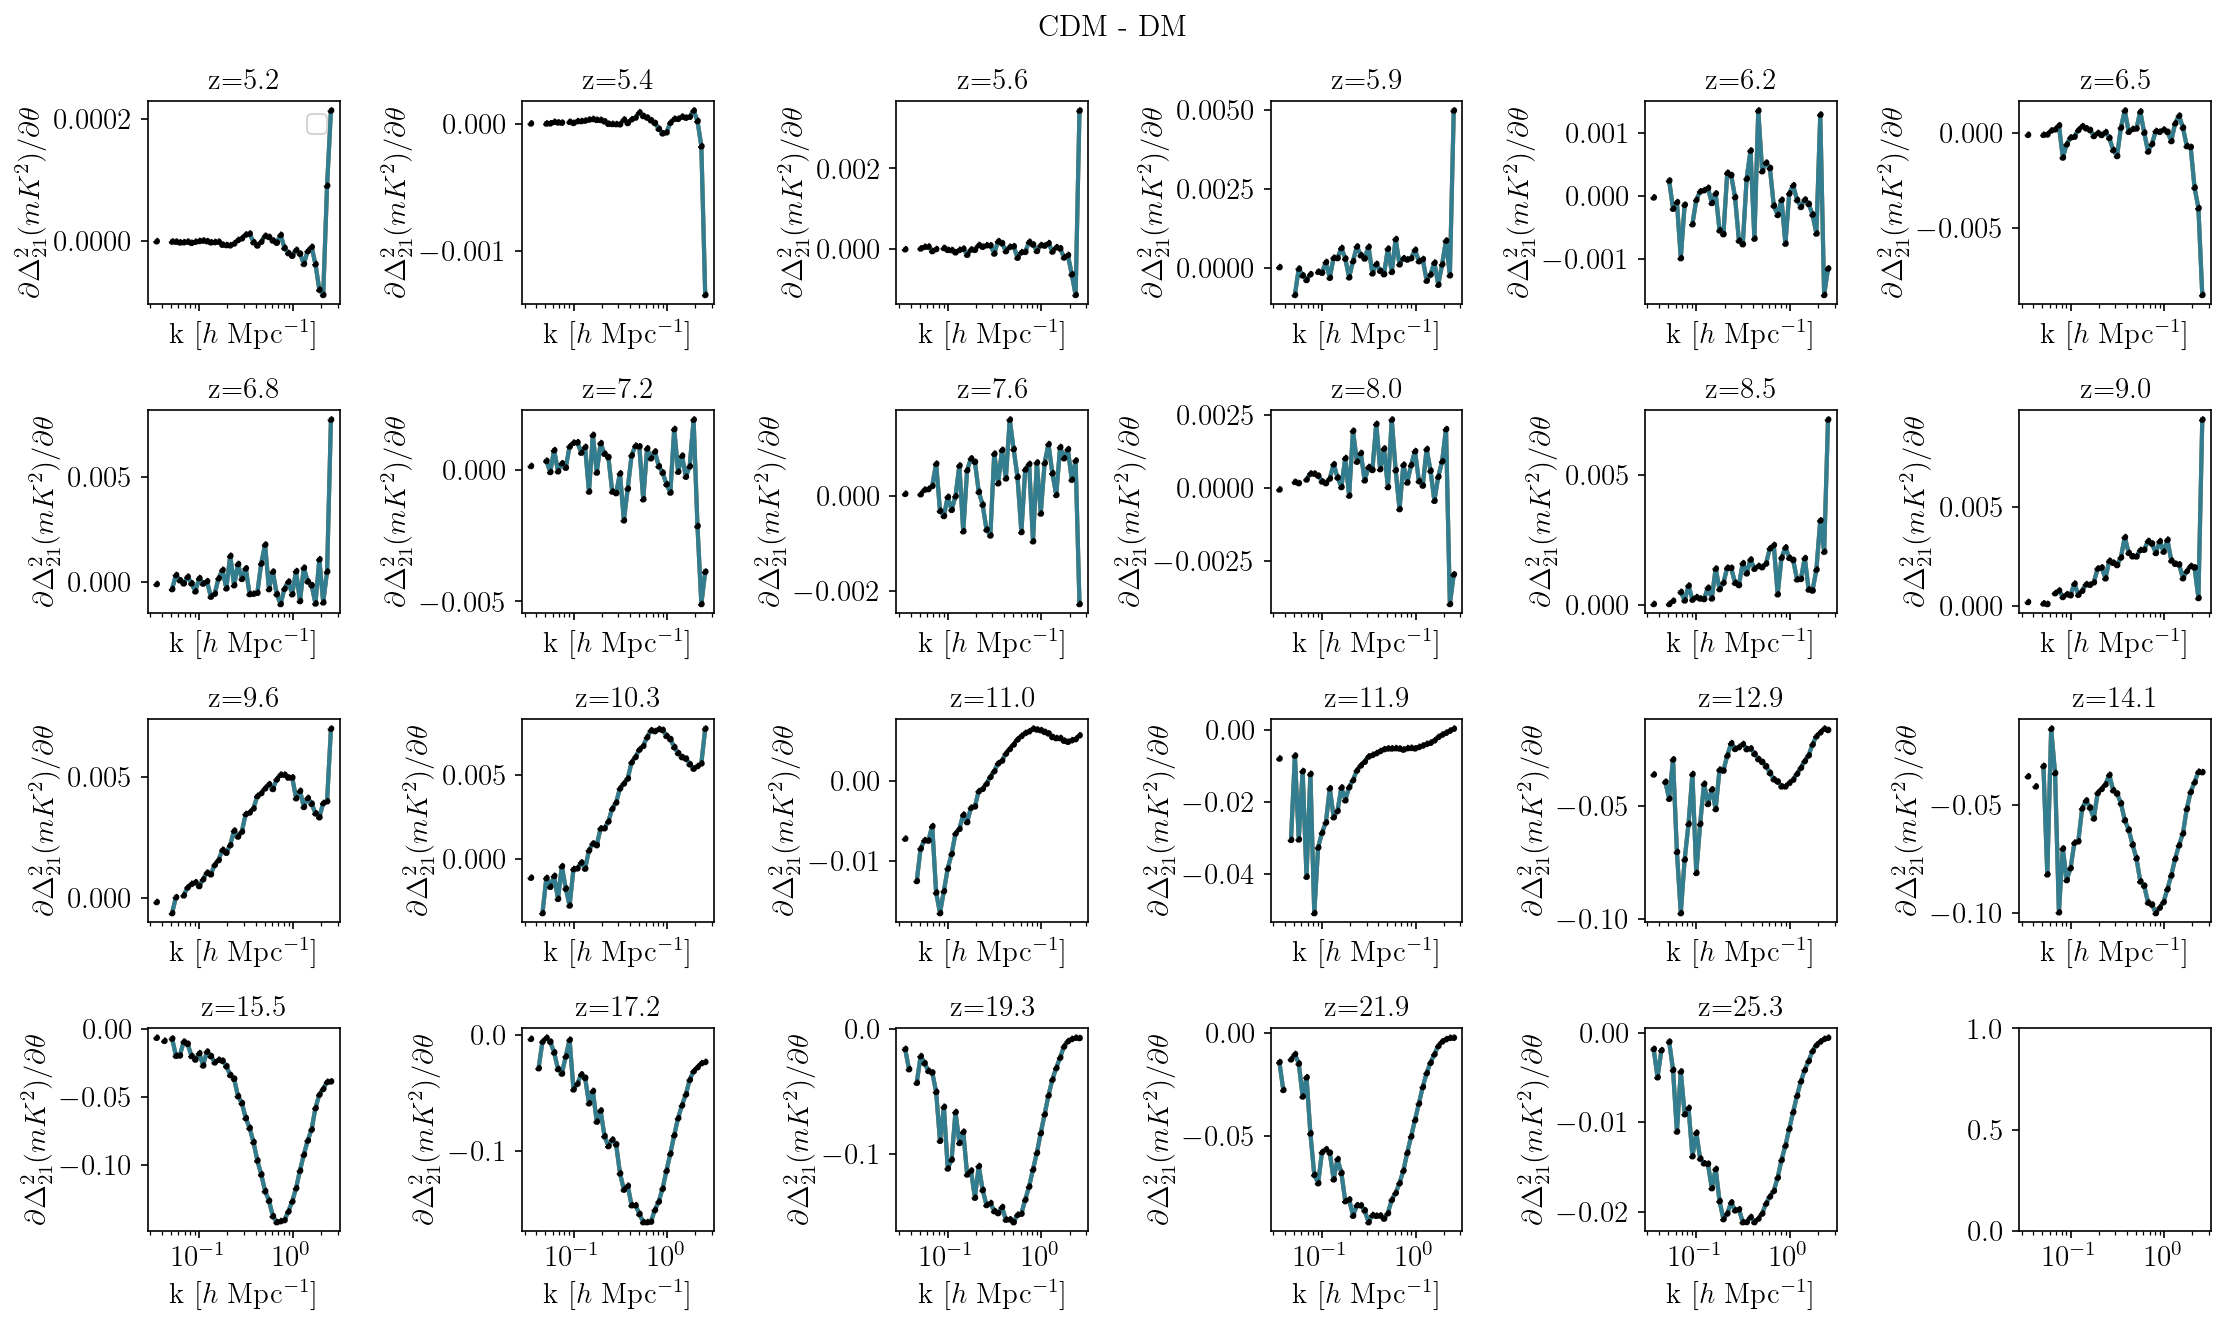

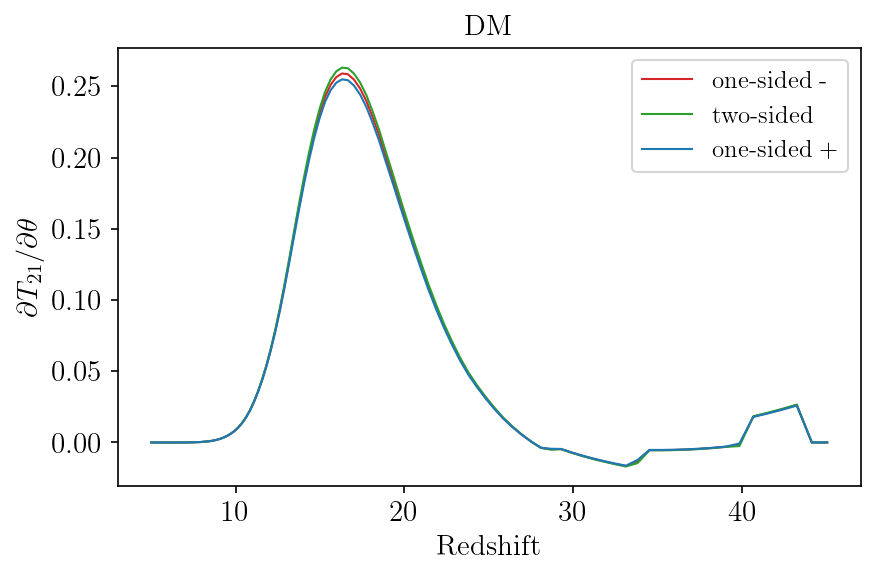

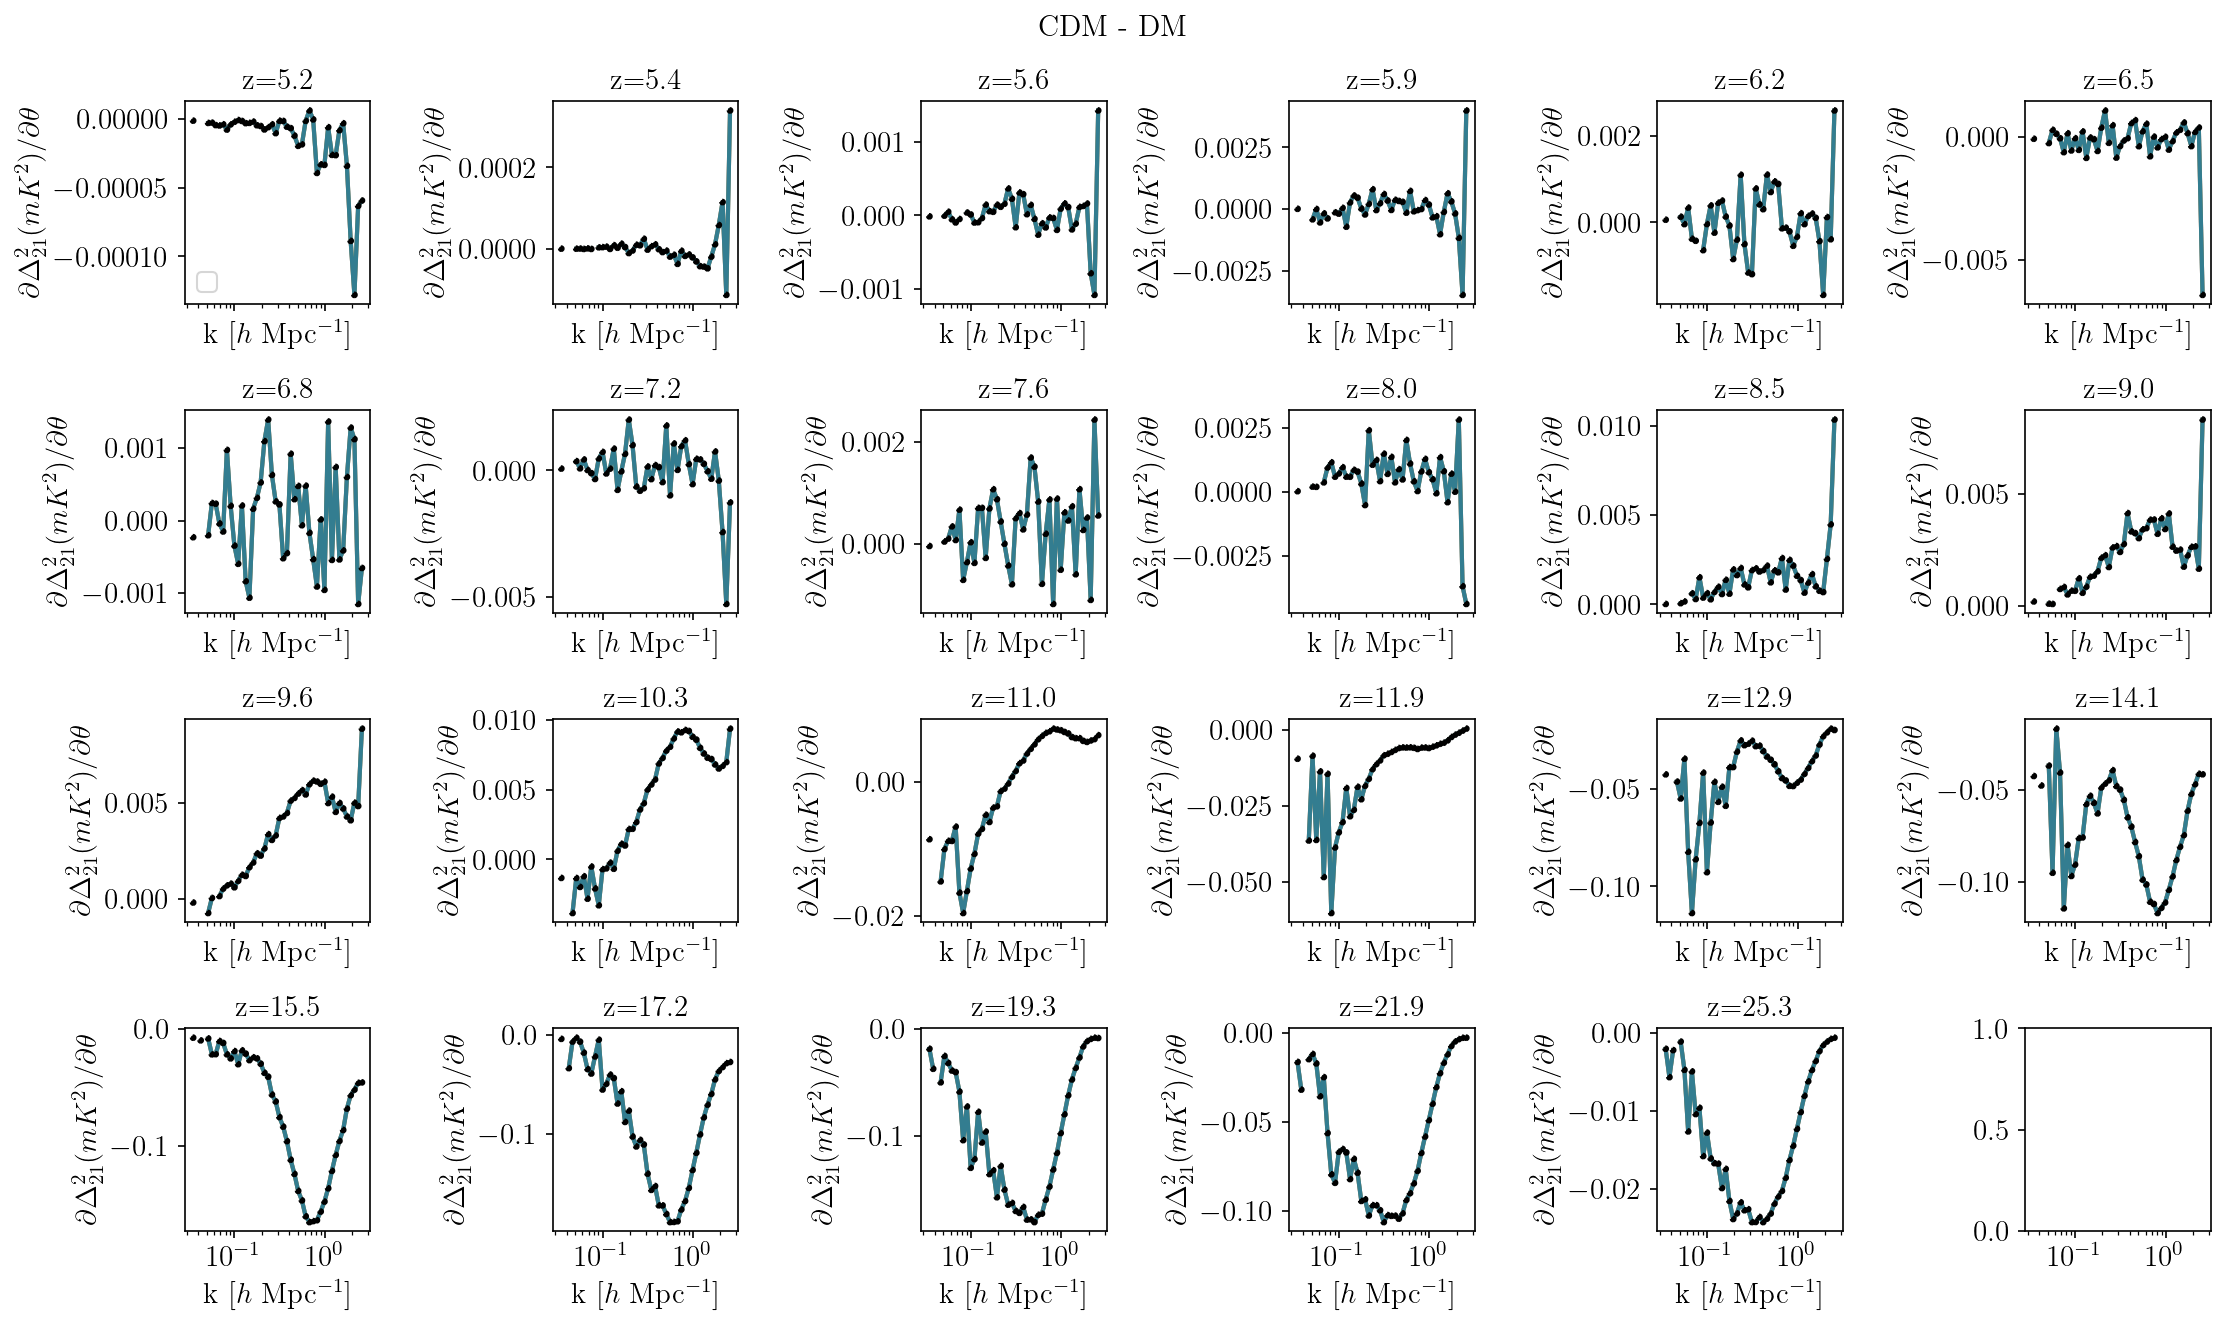

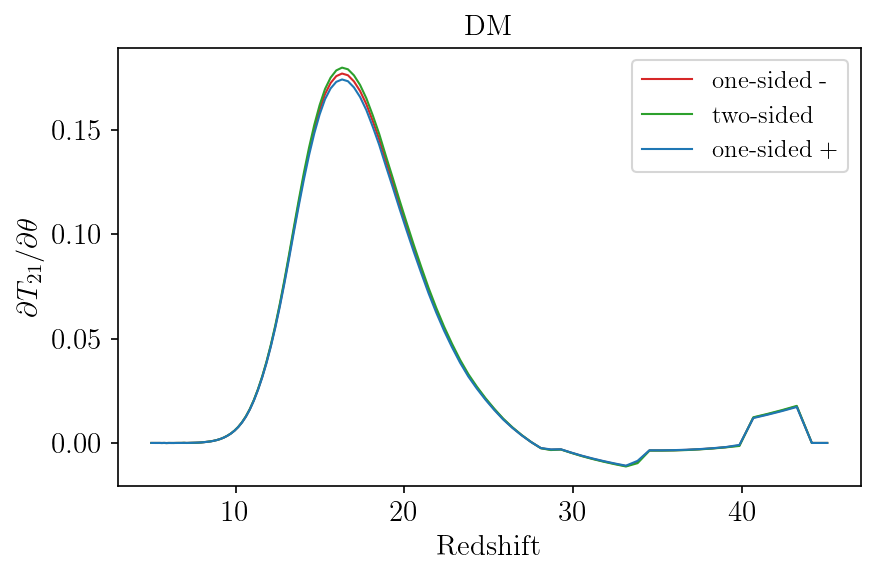

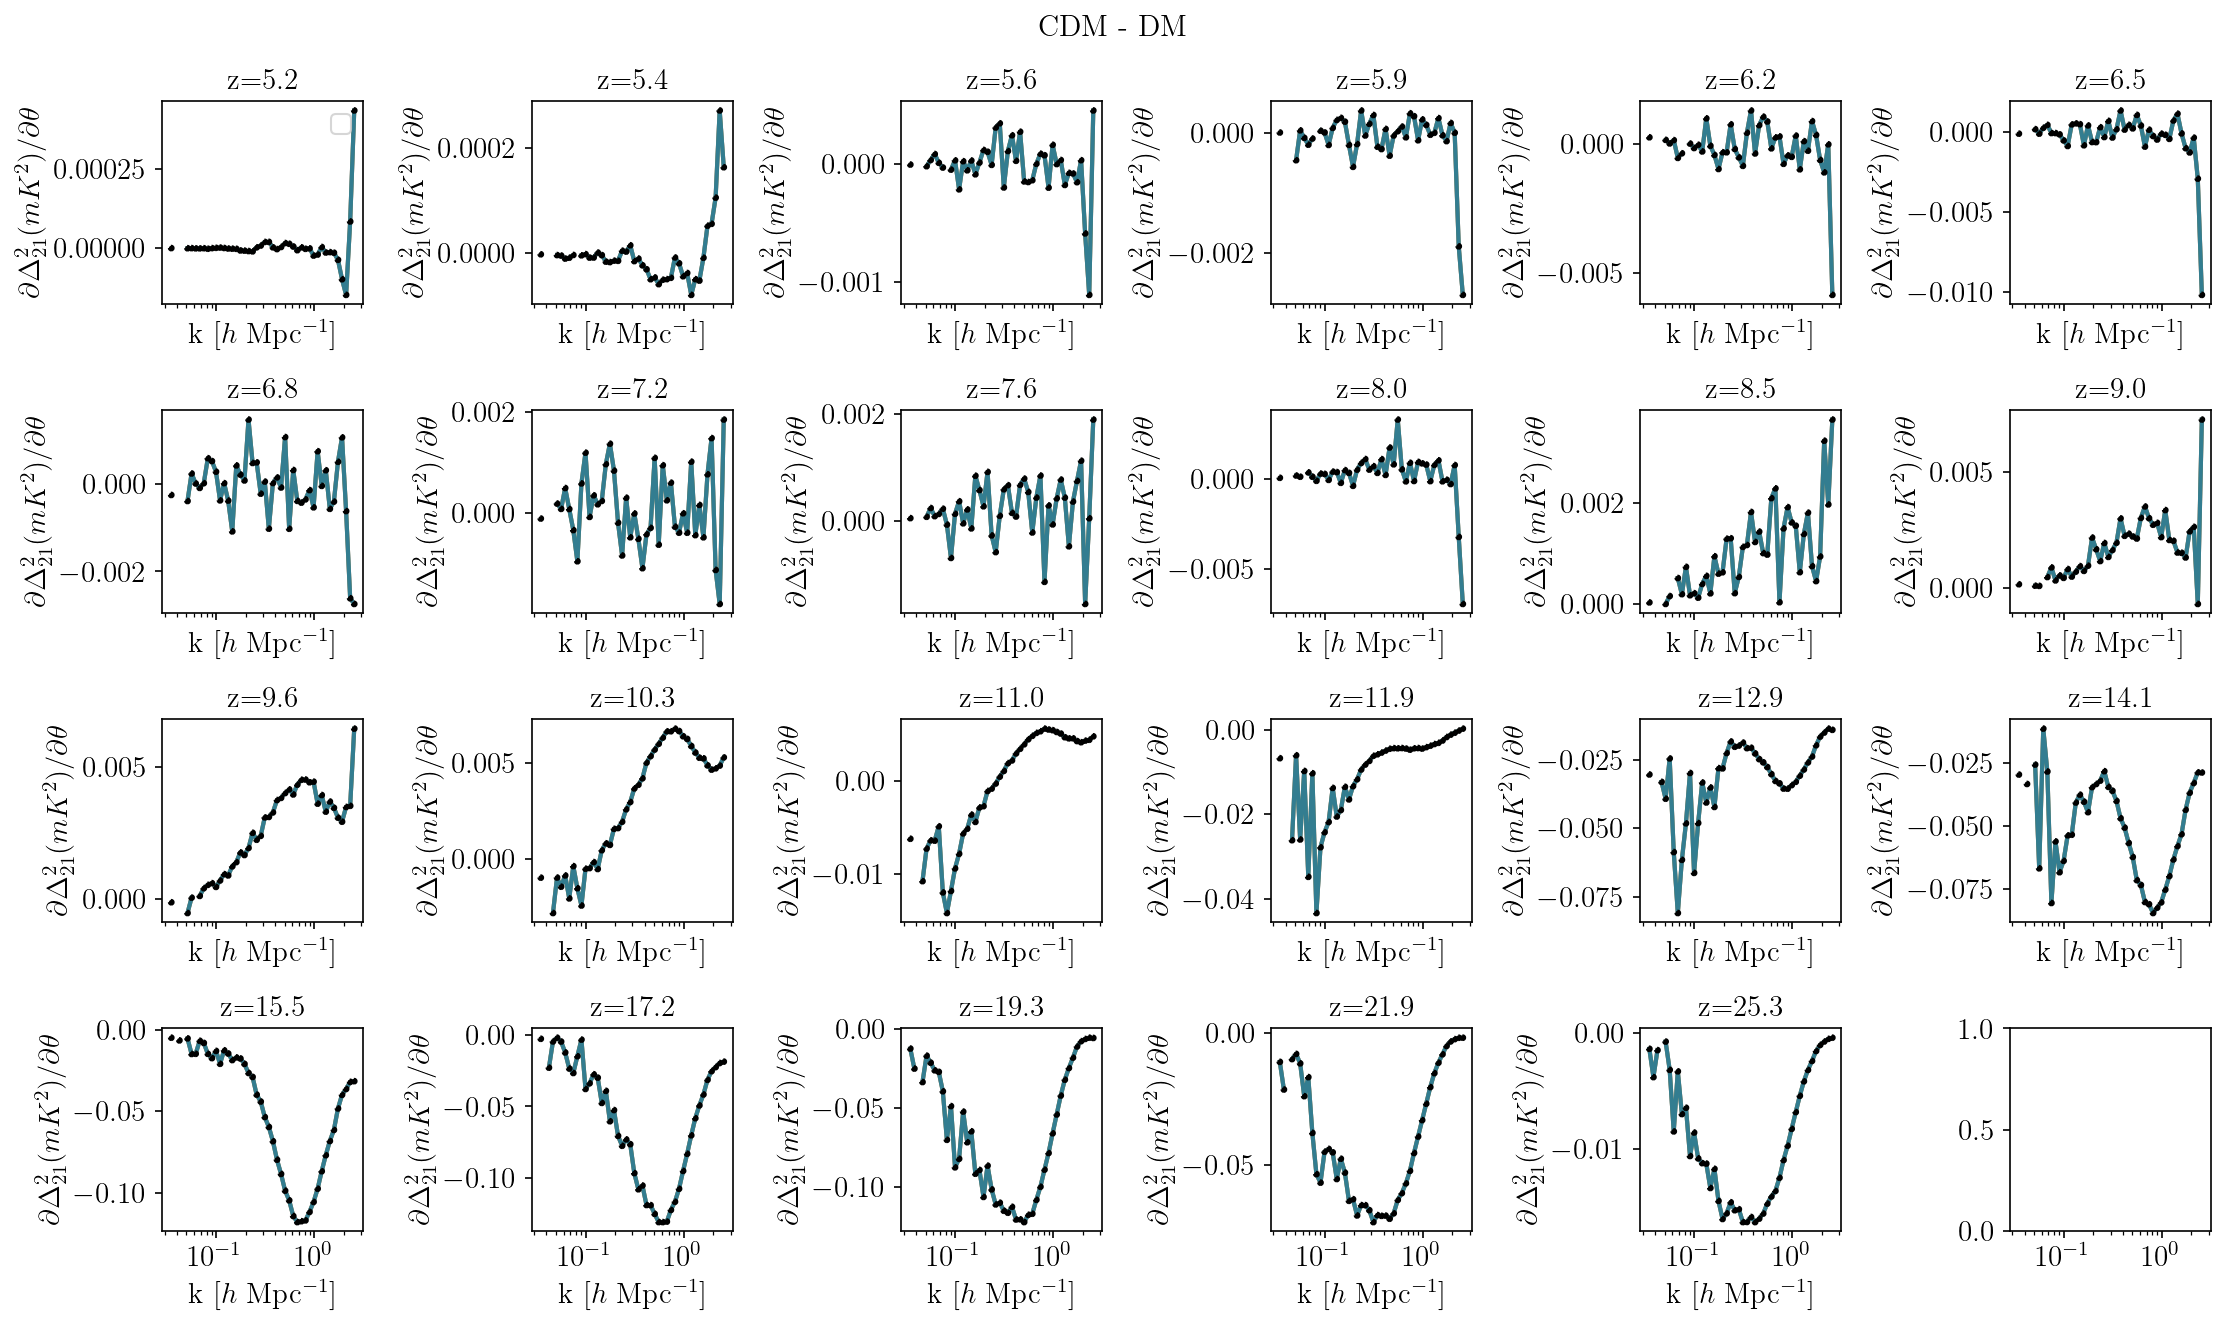

In [8]:
sigma_s = []
force_new = False

for m in mass_s:
    print(f'\n\nNow processing m={m:.3e}\n\n')

    lc_dir = f'{inj_dir}/log10m{np.log10(m):.3f}/'
    new = ('lc_redshifts.npy' not in os.listdir(lc_dir)) or force_new
    
    for param in astro_params_vary[:1]:
        params_EoS[param] = py21cmfish.Parameter(
            HII_DIM=128, BOX_LEN=256, param=param,
            output_dir=lc_dir,
            PS_err_dir=noise_dir, new=new,
        )

    Fij_matrix_PS, Finv_PS= py21cmfish.make_fisher_matrix(
        params_EoS,
        fisher_params=astro_params_vary,
        hpeak=0.0, obs='PS',
        k_min=0.1, k_max=1,
        sigma_mod_frac=0.2,
        add_sigma_poisson=True
    )
    sigma_s.append(np.sqrt(Finv_PS[0, 0]))
    
sigma_s = np.array(sigma_s)
print('sigma', sigma_s)

In [9]:
# check sigma as a multiple of step size. recommended: 30-100
sigma_s

array([48.86207329, 43.01595104, 57.8287214 ])

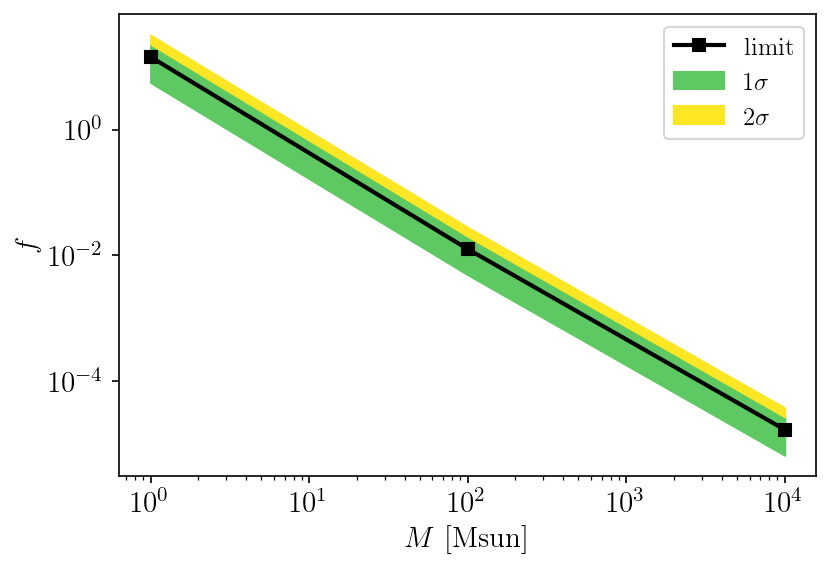

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

one_sigma = inj_s * sigma_s
upper_limit = np.sqrt(stats.chi2.ppf(.9, df=1)) * one_sigma

ax.plot(mass_s, upper_limit, 'k-s', label='limit')
ax.fill_between(mass_s, upper_limit + one_sigma, upper_limit - one_sigma, color=mpl.colormaps['viridis'](0.75), label='1$\sigma$')
ax.fill_between(mass_s, upper_limit + 2*one_sigma, upper_limit + one_sigma, color=mpl.colormaps['viridis'](1.0), label='2$\sigma$')

ax.set(xscale='log', yscale='log')

if run_name.startswith('pbh-hr'):
    ax.set(xlabel=r'$M$ [g]', ylabel=r'$f$')
elif run_name.startswith('pbh-acc'):
    ax.set(xlabel=r'$M$ [Msun]', ylabel=r'$f$')
elif run_name == 'pwave-phot':
    m_s = np.logspace(1.5, 12, 100)
    ax.plot(m_s, pwave_phot_c_sigma(m_s), 'r--', label='step size')
    ax.set(xlabel=r'$m_{DM}$ [eV]', ylabel=r'$C_\sigma$ [cm$^3$/s]')
elif run_name == 'pwave-elec':
    m_s = np.logspace(6.5, 12, 100)
    ax.plot(m_s, pwave_elec_c_sigma(m_s), 'r--', label='step size')
    ax.set(xlabel=r'$m_{DM}$ [eV]', ylabel=r'$C_\sigma$ [cm$^3$/s]')
ax.legend()

In [8]:
save_fn = f'../outputs/limits/{run_name}.txt'
dir_path = os.path.dirname(save_fn)
os.makedirs(dir_path, exist_ok=True)
np.savetxt(save_fn, np.array([mass_s, inj_s, sigma_s]).T, header='mass_s inj_s sigma_s')